Seeding the environment

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [2]:
# Set seed value
seed_value = 56
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)
# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
# 4. Set `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)
# 5. Configure a new global `tensorflow` session
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

# Libraries

In [3]:
import umint
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import adjusted_rand_score, fowlkes_mallows_score
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.model_selection import train_test_split
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics.pairwise import euclidean_distances
import random

# Importing Data

In [4]:
dir = '/home/chayan/UMINT/data/'
rna = pd.read_csv(dir+'MALT10k/MALT10k_rna_scaled.csv',header = 0 , index_col= 0)
adt = pd.read_csv(dir+'MALT10k/MALT10k_adt_scaled.csv',header = 0 , index_col= 0)
labels = pd.read_csv(dir+'MALT10k/MALT10k_groundTruth.csv',header = 0 , index_col= 0)

x1 = rna.T
x2 = adt.T
y = labels

z = pd.concat([x1, x2], axis=1)

In [5]:
x1.head()

,HES4,ISG15,RNF223,TNFRSF18,TNFRSF4,AURKAIP1,MRPL20,ANKRD65,VWA1,PRDM16,...,ITGB2,COL18A1,COL6A1,COL6A2,S100B,MT-CO1,MT-CO2,MT-CO3,MT-ND4,MT-ND6
AAACCCAAGAGGCGGA-1,-0.283539,1.447006,-0.028897,-0.298383,-0.298230,-0.557589,-0.513705,-0.035151,-0.03798,-0.027379,...,-0.475909,-0.103428,-0.052073,-0.122775,-0.062755,0.308415,0.091912,0.225137,-0.148823,2.246096
AAACCCAAGCGCCTTG-1,-0.283539,-0.611377,-0.028897,-0.298383,-0.298230,-0.557589,-0.513705,-0.035151,-0.03798,-0.027379,...,-0.475909,-0.103428,-0.052073,-0.122775,-0.062755,0.378704,-0.407126,0.515943,0.405317,-0.489769
AAACCCAAGTCTGCAT-1,-0.283539,1.119248,-0.028897,-0.298383,-0.298230,-0.557589,-0.513705,-0.035151,-0.03798,-0.027379,...,-0.475909,-0.103428,-0.052073,-0.122775,-0.062755,-0.321956,-0.906949,-1.108737,-0.070008,-0.489769
AAACCCACACCATAAC-1,-0.283539,-0.611377,-0.028897,-0.298383,-0.298230,-0.557589,-0.513705,-0.035151,-0.03798,-0.027379,...,1.735495,-0.103428,-0.052073,-0.122775,-0.062755,-0.877880,-0.381945,-0.705639,0.047047,1.694581
AAACCCAGTCTCTCCA-1,-0.283539,-0.611377,-0.028897,2.497703,3.353312,-0.557589,2.613531,-0.035151,-0.03798,-0.027379,...,-0.475909,-0.103428,-0.052073,-0.122775,-0.062755,-0.275217,0.160659,-0.401743,-0.883604,-0.489769


In [6]:
x2.head()

,CD3-TotalSeqB,CD4-TotalSeqB,CD8a-TotalSeqB,CD14-TotalSeqB,CD15-TotalSeqB,CD16-TotalSeqB,CD56-TotalSeqB,CD19-TotalSeqB,CD25-TotalSeqB,CD45RA-TotalSeqB,CD45RO-TotalSeqB,PD-1-TotalSeqB,TIGIT-TotalSeqB,CD127-TotalSeqB,IgG2a-control-TotalSeqB,IgG1-control-TotalSeqB,IgG2b-control-TotalSeqB
AAACCCAAGAGGCGGA-1,-0.956528,-0.775682,-0.378522,-0.777337,2.137927,0.060403,1.358713,0.929161,-0.151819,1.419617,-0.605580,-0.778831,-0.846877,-0.490864,0.780544,1.545509,0.625713
AAACCCAAGCGCCTTG-1,-0.926247,-0.718259,-0.281358,-0.139346,-0.683658,-0.760036,0.851665,1.082966,1.162097,0.277738,-0.878979,0.732389,-0.501777,-0.607447,0.287076,0.063787,1.272979
AAACCCAAGTCTGCAT-1,1.559906,1.633956,-0.293192,1.446181,-0.867679,-0.633132,-1.092797,-1.332206,-1.003934,-1.121222,1.427399,-0.802599,-0.538645,2.444899,-0.628274,-1.091760,-0.712178
AAACCCACACCATAAC-1,1.286571,1.671451,-0.360024,1.547936,-0.244116,-0.289261,-0.661204,-1.211531,-1.044990,-1.230086,1.452628,-0.524531,-1.196441,2.509845,-0.297356,-0.960420,-0.191731
AAACCCAGTCTCTCCA-1,1.339836,1.360836,0.007774,-0.037521,-0.977992,-1.113618,-1.040980,-1.313861,-0.958297,-1.208143,1.400882,1.127564,1.415229,-0.505822,-1.035293,-1.302674,-0.072429


In [7]:
le = preprocessing.LabelEncoder()
y = pd.DataFrame(le.fit_transform(np.ravel(labels)))

In [8]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

## Proposed UMINT architecture
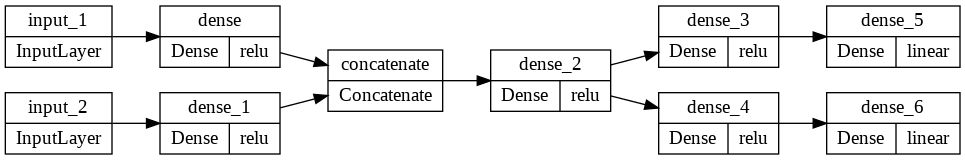

In [9]:
# Original pair-wise distances
dist_orig1 = np.square(euclidean_distances(x1, x1)).flatten()
dist_orig2 = np.square(euclidean_distances(x2, x2)).flatten()

In [10]:
num_clusters = len(np.unique(y))
recons={}
result_agl = {}
result_km = {}
seed = []

for i in range(10):
    print('#Run: ', i+1)
    
    sd = random.randint(0, 100)
    seed.append(sd)
    
    x1_train, x1_test, x2_train, x2_test, z_train, z_test, y_train, y_test = train_test_split(x1, x2, z, y, test_size=0.2,
                                                                                          random_state=sd)
    #UMINT
    MyEncoder, MyAE = umint.CombinedEncoder([x1_train, x2_train], [x1_test, x2_test], [128, 10], 64, 98, 0.0001, 0.001, 25, 16)
    low = MyEncoder.predict([x1, x2])
    clusters_agl = AgglomerativeClustering(n_clusters= num_clusters).fit_predict(low)
    clusters_km = KMeans(n_clusters= num_clusters).fit_predict(low)
    
    # pair-wise distances
    dist_EncoderRNA = np.square(euclidean_distances(MyAE.predict([x1, x2])[0], MyAE.predict([x1, x2])[0])).flatten()
    dist_EncoderADT = np.square(euclidean_distances(MyAE.predict([x1, x2])[1], MyAE.predict([x1, x2])[1])).flatten()  
    coef_RNA, p_RNA = pearsonr(dist_orig1, dist_EncoderRNA)
    coef_ADT, p_ADT = pearsonr(dist_orig2, dist_EncoderADT)

    
    recons[i] = [coef_RNA, coef_ADT]
    result_agl[i] = [adjusted_rand_score(y[0], clusters_agl), fowlkes_mallows_score(y[0], clusters_agl)]
    result_km[i] = [adjusted_rand_score(y[0], clusters_km), fowlkes_mallows_score(y[0], clusters_km)]

#Run:  1
263/263 [==============================] - 0s 2ms/step
#Run:  2
263/263 [==============================] - 0s 2ms/step
#Run:  3
263/263 [==============================] - 0s 1ms/step
#Run:  4
263/263 [==============================] - 0s 2ms/step
#Run:  5
263/263 [==============================] - 0s 2ms/step
#Run:  6
263/263 [==============================] - 0s 2ms/step
#Run:  7
263/263 [==============================] - 0s 2ms/step
#Run:  8
263/263 [==============================] - 0s 2ms/step
#Run:  9
263/263 [==============================] - 0s 2ms/step
#Run:  10
263/263 [==============================] - 0s 2ms/step


In [11]:
r1 = [pd.DataFrame(np.ravel(recons[i])).T for i in range(len(recons))]
rec1 = pd.concat(r1)
rec1.index = range(len(recons))
rec1.columns = ['Pearson_RNA_UMINT','Pearson_ADT_UMINT']
rec1.loc[len(recons)] = rec1.mean(numeric_only=True, axis=0)
rec1.rename(index={len(recons):'avg'},inplace=True)
rec1

,Pearson_RNA_UMINT,Pearson_ADT_UMINT
0,0.810855,0.943749
1,0.765401,0.944148
2,0.892829,0.942139
3,0.938645,0.942156
4,0.904389,0.963966
5,0.901102,0.939237
6,0.907094,0.932461
7,0.918130,0.932975
8,0.915890,0.953086
9,0.814388,0.945819


In [12]:
r2 = [pd.DataFrame(np.ravel(result_agl[i])).T for i in range(len(result_agl))]
rec2 = pd.concat(r2)
rec2.index = range(len(result_agl))
rec2.columns = ['ARI_Agglomaretive','FMI_Agglomaretive']
rec2.loc[len(result_agl)] = rec2.mean(numeric_only=True, axis=0)
rec2.rename(index={len(result_agl):'avg'},inplace=True)
rec2

,ARI_Agglomaretive,FMI_Agglomaretive
0,0.590105,0.679617
1,0.551874,0.659475
2,0.548986,0.659597
3,0.578595,0.671985
4,0.615047,0.699117
5,0.596257,0.683308
6,0.594289,0.684513
7,0.588857,0.677967
8,0.607805,0.691851
9,0.600700,0.689924


In [13]:
r3 = [pd.DataFrame(np.ravel(result_km[i])).T for i in range(len(result_km))]
rec3 = pd.concat(r3)
rec3.index = range(len(result_km))
rec3.columns = ['ARI_KMeans','FMI_KMeans']
rec3.loc[len(result_km)] = rec3.mean(numeric_only=True, axis=0)
rec3.rename(index={len(result_km):'avg'},inplace=True)
rec3

,ARI_KMeans,FMI_KMeans
0,0.634423,0.710086
1,0.622103,0.707356
2,0.623375,0.709551
3,0.653187,0.722961
4,0.621697,0.708134
5,0.657617,0.725498
6,0.671626,0.736722
7,0.670691,0.735534
8,0.601907,0.691111
9,0.665915,0.731590
